In [1]:
import warnings

# Suppress the FutureWarnings related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import joblib

# Labes
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1,L2,L3,L4]
# Features
FEATURES = [f"feature_{i}" for i in range (1,769)]

In [3]:
# Import the datasets

train_df = pd.read_csv("layer_7_train.csv")
valid_df = pd.read_csv("layer_7_valid.csv")
test_df = pd.read_csv("test.csv")

In [4]:
test_df.columns

Index(['ID', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_759', 'feature_760', 'feature_761', 'feature_762',
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'feature_768'],
      dtype='object', length=769)

In [5]:
print(f"train{train_df.shape},val{valid_df.shape},test{test_df.shape}")

train(28520, 772),val(750, 772),test(744, 769)


In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

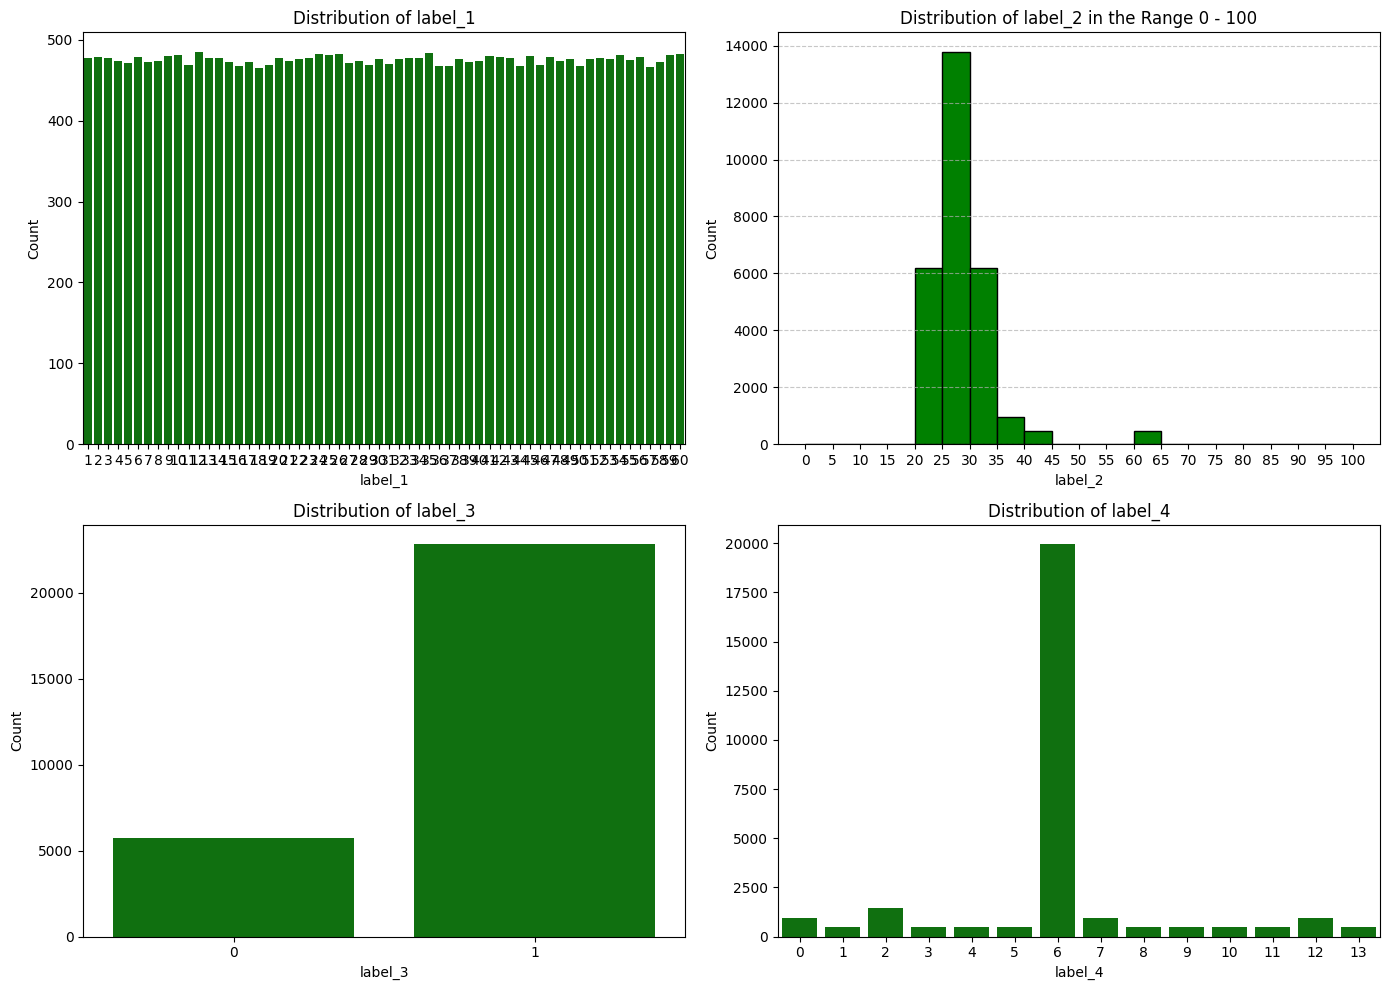

In [7]:
# plot the graphs for each lables to identify the distribution
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, label in enumerate(LABELS):
    ax = axs[idx // 2, idx % 2]  

    if label == L2:
        age_range = (0, 100)  
        filtered_df = train_df[(train_df[label] >= age_range[0]) & (train_df[label] <= age_range[1])]
        ax.hist(filtered_df[label], bins=20, range=age_range, edgecolor='k', color='green')
        ax.set_title(f'Distribution of {label} in the Range {age_range[0]} - {age_range[1]}')
        ax.set_xlabel(label)
        ax.set_ylabel('Count')
        ax.set_xticks(range(age_range[0], age_range[1] + 1, 5))  
        ax.grid(axis='y', linestyle='--', alpha=0.7)
    else:
        sns.countplot(x=label, data=train_df, ax=ax, color='green')  
        ax.set_title(f'Distribution of {label}')
        ax.set_ylabel('Count')
        ax.set_xlabel(label)

plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
x_train = {}
x_valid = {}
y_train = {}
y_valid = {}
x_test = {}

In [9]:
# Scaler the data
for target_label in LABELS:

  # Dropping missing values
  tr_df = train_df[train_df['label_2'].notna()] if target_label == 'label_2' else train_df
  vl_df = valid_df[valid_df['label_2'].notna()] if target_label == 'label_2' else valid_df
  tst_df = test_df

  scaler = StandardScaler()

  x_train[target_label] = pd.DataFrame(scaler.fit_transform(tr_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = tr_df[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(vl_df.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = vl_df[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(tst_df.drop('ID', axis = 1)), columns=FEATURES)


In [10]:
id_test = test_df['ID']

In [11]:
print(f"train-L1 {len(x_train['label_1'])},val-L1 {len(x_valid['label_1'])}")
print(f"train-L2 {len(x_train['label_2'])},val-L2 {len(x_valid['label_2'])}")
print(f"train-L3 {len(x_train['label_3'])},val-L3 {len(x_valid['label_3'])}")
print(f"train-L4 {len(x_train['label_4'])},val-L4 {len(x_valid['label_4'])}")

train-L1 28520,val-L1 750
train-L2 28040,val-L2 736
train-L3 28520,val-L3 750
train-L4 28520,val-L4 750


In [12]:
# # Defining a function to perform k-fold cross-validation for a given model

# from numpy.random import multinomial
# from sklearn import svm
# from sklearn.neighbors import KNeighborsClassifier


# def k_fold_cross_validation(model, X, y, k=3):
#     if model == 'svc':
#         classifier = svm.SVC()
#     elif model == 'kNN':
#         classifier = KNeighborsClassifier(n_neighbors=k)
#     elif model == 'NBay':
#         classifier = multinomial()
#     elif model == 'cat':
#         classifier = CatBoostClassifier(iterations=100, 
#                                         learning_rate=0.1, 
#                                         depth=6, 
#                                         loss_function='MultiClass',  # Specify multi-class loss
#                                         eval_metric='Accuracy', 
#                                         random_seed=42, 
#                                         verbose=200)
#     elif model == 'RF':
#         classifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
#     elif model == 'xgb':
        
#         label_encoder = LabelEncoder()
#         y = label_encoder.fit_transform(y)

#         classifier = xgb.XGBClassifier(
#             n_estimators=100,             
#             max_depth=3,                  
#             learning_rate=0.1,            
#             random_state=42               
#         )

#     kf = KFold(n_splits=k, shuffle=True, random_state=42)

#     X = X.values
#     y = y.ravel()  # 

#     scores = []
#     for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
#         X_train_fold, X_test_fold = X[train_idx], X[test_idx]
#         y_train_fold, y_test_fold = y[train_idx], y[test_idx]

#         X_train_fold = np.maximum(X_train_fold, 0)
#         X_test_fold = np.maximum(X_test_fold, 0)

#         if model == 'cat':
#             classifier.fit(X_train_fold, y_train_fold, cat_features=[])  
#         else:
#             classifier.fit(X_train_fold, y_train_fold)

#         fold_score = classifier.score(X_test_fold, y_test_fold)
#         scores.append(fold_score)

#         print(f"{model} - Fold {fold + 1}/{k}: Score = {fold_score:.4f}")

#     print(f"{model} - Average Score: {np.mean(scores):.4f}")



# Label_01
0.95 - svm


In [13]:
# Fit the model before feature selection


from sklearn import svm


clf = svm.SVC( class_weight='balanced')
clf.fit(x_train[L1], y_train[L1])
y_pred = clf.predict(x_valid[L1])

In [14]:
from sklearn import metrics
from sklearn.decomposition import PCA

In [15]:
# print the accuracy, precision and recall

print("========================= Acuuracy Before Feature Selection Label 1 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L1], y_pred)}")
print(f"Precision: {metrics.precision_score(y_valid[L1], y_pred, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L1], y_pred,average='weighted')}")

========================= Acuuracy Before Feature Selection Label 1 =========================
Accuracy: 0.956
Precision: 0.9622013805882228
Recall: 0.956


## Feature Selection

In [16]:
# Feature selection with n_components = 0.95

pca = PCA(n_components = 0.95, svd_solver ='full')
pca.fit(x_train[L1])
x_train_trans_L1 = pd.DataFrame(pca.transform(x_train[L1]))
x_valid_trans_L1 = pd.DataFrame(pca.transform(x_valid[L1]))
x_test_trans_L1 = pd.DataFrame(pca.transform(x_test[L1]))

In [17]:
x_train_trans_L1.shape

(28520, 321)

In [18]:
# Fit the model after feature selection

clf = svm.SVC(class_weight='balanced')
clf.fit(x_train_trans_L1, y_train[L1])
y_pred_L1 = clf.predict(x_valid_trans_L1 )
y_test_L1 = clf.predict(x_test_trans_L1)

In [19]:
from sklearn import metrics
from sklearn.decomposition import PCA

In [20]:
# print the accuracy, precision and recall

print("========================= Acuuracy Before Hyper Parameter Tune Label 1 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L1], y_pred_L1)}")
print(f"Precision: {metrics.precision_score(y_valid[L1], y_pred_L1, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L1], y_pred_L1,average='weighted')}")

========================= Acuuracy Before Hyper Parameter Tune Label 1 =========================
Accuracy: 0.956
Precision: 0.962708739895582
Recall: 0.956


In [21]:
# #Check cross validation scores for kNN, SVC, RF, XGB, NBay 

# k_fold_cross_validation('kNN',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('svc',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('RF',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('xgb',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('NBay',x_train_trans_L1,y_train[L1])

In [22]:
x_train_trans_L1.shape

(28520, 321)

In [23]:
# #Check cross validation scores for kNN, SVC, RF, XGB, NBay 

# k_fold_cross_validation('kNN',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('svc',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('RF',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('xgb',x_train_trans_L1,y_train[L1])
# k_fold_cross_validation('NBay',x_train_trans_L1,y_train[L1])

## Hyper Parameter Tuning

In [24]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [25]:
# Hyper parameter tuning with RandomizedSearch

param_dist = {
    'C': [0.1,1,10],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'degree': [1,2] , 
    'gamma': [0.001, 0.1,1]  
}

k = 4  
kf = KFold(n_splits=k, shuffle=True, random_state=42) 

clf = svm.SVC()

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=3,  
    cv=kf,  
    random_state=42,  
    n_jobs=-1,  
    verbose=2
)

random_search.fit(x_train_trans_L1, y_train[L1])

best_estimator_L1 = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)

y_new_trans = best_estimator_L1.predict(x_valid_trans_L1)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'degree': 1, 'C': 1}


In [26]:
y_test_L1 = best_estimator_L1.predict(x_test_trans_L1)

In [27]:
# print the accuracy, precision and recall

print("========================= Acuuracy After k fold Cross Validation and Hyper Parameter Tuning Label 1 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L1], y_new_trans)}")
print(f"Precision: {metrics.precision_score(y_valid[L1], y_new_trans, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L1], y_new_trans,average='weighted')}")

========================= Acuuracy After k fold Cross Validation and Hyper Parameter Tuning Label 1 =========================
Accuracy: 0.948
Precision: 0.9567545577229788
Recall: 0.948


In [28]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Label_2
0.97 - svm

In [29]:
# Fit the model before feature selection

clf = svm.SVC(class_weight='balanced')
clf.fit(x_train[L2], y_train[L2])
y_pred_L2 = clf.predict(x_valid[L2])

In [30]:
# print the accuracy, precision and recall

print("========================= Acuuracy Before Feature Selection Label 2 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L2], y_pred_L2)}")
print(f"Precision: {metrics.precision_score(y_valid[L2], y_pred_L2, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L2], y_pred_L2,average='weighted')}")

========================= Acuuracy Before Feature Selection Label 2 =========================
Accuracy: 0.9252717391304348
Precision: 0.9268773120714625
Recall: 0.9252717391304348


## Feature Selection

In [31]:
# # Feature selection with n_components = 0.95

# pca = PCA(n_components = 0.95, svd_solver ='full')
# pca.fit(x_train[L2])
# x_train_trans_L2 = pd.DataFrame(pca.transform(x_train[L2]))
# x_valid_trans_L2 = pd.DataFrame(pca.transform(x_valid[L2]))
# x_test_trans_L2 = pd.DataFrame(pca.transform(x_test[L2]))

In [32]:
# #Check cross validation scores for kNN, SVC, RF, XGB, NBay 

# k_fold_cross_validation('kNN',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('svc',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('RF',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('xgb',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('NBay',x_train_trans_L2,y_train[L2])

In [33]:
# Feature selection with n_components = 0.97

pca = PCA(n_components = 0.97, svd_solver ='full')
pca.fit(x_train[L2])
x_train_trans_L2 = pd.DataFrame(pca.transform(x_train[L2]))
x_valid_trans_L2 = pd.DataFrame(pca.transform(x_valid[L2]))
x_test_trans_L2 = pd.DataFrame(pca.transform(x_test[L2]))

In [34]:
x_train_trans_L2.shape

(28040, 413)

In [35]:
# #Check cross validation scores for kNN, SVC, RF, XGB, NBay 

# k_fold_cross_validation('kNN',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('svc',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('RF',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('xgb',x_train_trans_L2,y_train[L2])
# k_fold_cross_validation('NBay',x_train_trans_L2,y_train[L2])

In [36]:
# Fit the model after feature selection

clf = svm.SVC(class_weight='balanced')
clf.fit(x_train_trans_L2, y_train[L2])
y_pred_L2 = clf.predict(x_valid_trans_L2)
y_test_L2 = clf.predict(x_test_trans_L2)

In [37]:
# print the accuracy, precision and recall

print("========================= Acuuracy Before Hyper Parameter Tune Label 2 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L2], y_pred_L2)}")
print(f"Precision: {metrics.precision_score(y_valid[L2], y_pred_L2, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L2], y_pred_L2,average='weighted')}")

========================= Acuuracy Before Hyper Parameter Tune Label 2 =========================
Accuracy: 0.9184782608695652
Precision: 0.9203031940163229
Recall: 0.9184782608695652


## Hyper Parameter Tuning

In [38]:
# Hyper parameter tuning with RandomizedSearch

param_dist = {
    'C': [0.1,1,10],  
    'kernel': [ 'rbf', 'poly'],  
    'degree': [1,2] , 
    'gamma': [0.001, 0.1,1]  
}

clf = svm.SVC()

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=3,  
    cv=5,  
    random_state=42,  
    n_jobs=-1,  
    verbose=2
)

random_search.fit(x_train_trans_L2, y_train[L2])

best_estimator_L2 = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)

# Now you can use the best_estimator for predictions
y_new_trans_L2 = best_estimator_L2.predict(x_valid_trans_L2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 10}


In [39]:
y_test_L2 = best_estimator_L2.predict(x_test_trans_L2)

In [40]:
# print the accuracy, precision and recall

print("========================= Acuuracy After k fold Cross Validation and Hyper Parameter Tuning Label 2 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L2], y_new_trans_L2)}")
print(f"Precision: {metrics.precision_score(y_valid[L2], y_new_trans_L2, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L2], y_new_trans_L2,average='weighted')}")

========================= Acuuracy After k fold Cross Validation and Hyper Parameter Tuning Label 2 =========================
Accuracy: 0.9266304347826086
Precision: 0.9289140959520406
Recall: 0.9266304347826086


# Label_03
0.95 - svm

In [41]:
# Fit the model before feature selection

clf = svm.SVC(class_weight='balanced')
clf.fit(x_train[L3], y_train[L3])
y_pred_L3 = clf.predict(x_valid[L3])

In [42]:
# print the accuracy, precision and recall

print("========================= Acuuracy Before Feature Selection Label 3 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L3], y_pred_L3)}")
print(f"Precision: {metrics.precision_score(y_valid[L3], y_pred_L3, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L3], y_pred_L3,average='weighted')}")

========================= Acuuracy Before Feature Selection Label 3 =========================
Accuracy: 0.9986666666666667
Precision: 0.9986759906759908
Recall: 0.9986666666666667


## Feature Selection

In [43]:
# Feature selection with n_components = 0.95

pca = PCA(n_components = 0.95, svd_solver ='full')
pca.fit(x_train[L3])
x_train_trans_L3 = pd.DataFrame(pca.transform(x_train[L3]))
x_valid_trans_L3 = pd.DataFrame(pca.transform(x_valid[L3]))
x_test_trans_L3 = pd.DataFrame(pca.transform(x_test[L3]))

In [44]:
x_train_trans_L3.shape

(28520, 321)

In [45]:
# # cross validation for kNn, svc, RF, xgb, NBay models

# k_fold_cross_validation('kNN',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('svc',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('RF',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('xgb',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('NBay',x_train_trans_L3,y_train[L3])

In [46]:
# # Feature selection with n_components = 0.97

# pca = PCA(n_components = 0.97, svd_solver ='full')
# pca.fit(x_train[L3])
# x_train_trans_L3 = pd.DataFrame(pca.transform(x_train[L3]))
# x_valid_trans_L3 = pd.DataFrame(pca.transform(x_valid[L3]))
# x_test_trans_L3 = pd.DataFrame(pca.transform(x_test))

In [47]:
# x_train_trans_L3.shape

In [48]:
# # Cross validation for kNN, SVC, RF, XGB, NBay models

# k_fold_cross_validation('kNN',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('svc',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('RF',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('xgb',x_train_trans_L3,y_train[L3])
# k_fold_cross_validation('NBay',x_train_trans_L3,y_train[L3])

In [49]:
# Fit the model after feature selection

clf = svm.SVC(class_weight='balanced')
clf.fit(x_train_trans_L3, y_train[L3])
y_pred_L3 = clf.predict(x_valid_trans_L3)
y_test_L3 = clf.predict(x_test_trans_L3)

In [50]:
# print the accuracy, precision and recall

print("========================= Acuuracy Before Hyper Parameter Tune Label 3 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L3], y_pred_L3)}")
print(f"Precision: {metrics.precision_score(y_valid[L3], y_pred_L3, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L3], y_pred_L3,average='weighted')}")

========================= Acuuracy Before Hyper Parameter Tune Label 3 =========================
Accuracy: 0.9986666666666667
Precision: 0.9986759906759908
Recall: 0.9986666666666667


## Hyper Parameter Tuning

In [51]:
# Hyperparameter Tuning with RandomizedSearch

param_dist = {
    'C': [0.1,1,10],  
    'kernel': [ 'linear','rbf', 'poly'],  
    'degree': [1,2] , 
    'gamma': [0.001, 0.1,1]  
}

k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

clf = svm.SVC()

random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=3,  
    cv=kf,  
    random_state=42,  
    n_jobs=-1,  
    verbose=2
)


random_search.fit(x_train_trans_L3, y_train[L3])


best_estimator_L3 = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)

y_new_trans_L3 = best_estimator_L3.predict(x_valid_trans_L3)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'degree': 1, 'C': 1}


In [52]:
y_test_L3 = best_estimator_L3.predict(x_test_trans_L3)

In [53]:
# print the accuracy , precision and recall

print("========================= Acuuracy After k fold Cross Validation and Hyper Parameter Tuning Label 3 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L3], y_new_trans_L3)}")
print(f"Precision: {metrics.precision_score(y_valid[L3], y_new_trans_L3, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L3], y_new_trans_L3,average='weighted')}")

========================= Acuuracy After k fold Cross Validation and Hyper Parameter Tuning Label 3 =========================
Accuracy: 0.9986666666666667
Precision: 0.9986759906759908
Recall: 0.9986666666666667


# Label_04
0.95 - kNN

In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
# pip install -U imbalanced-learn

In [55]:
# Fit the model before feature selection

clf = svm.SVC()
clf.fit(x_train[L4], y_train[L4])
y_pred_L4 = clf.predict(x_valid[L4])

In [56]:
# Print the accuracy, precision, and recall

print("========================= Acuuracy Before Feature Selection Label 3 =========================")
print(f"Accuracy: {metrics.accuracy_score(y_valid[L4], y_pred_L4)}")
print(f"Precision: {metrics.precision_score(y_valid[L4], y_pred_L4, average='weighted')}")
print(f"Recall: {metrics.recall_score(y_valid[L4], y_pred_L4,average='weighted')}")

========================= Acuuracy Before Feature Selection Label 3 =========================
Accuracy: 0.9493333333333334
Precision: 0.95200259000259
Recall: 0.9493333333333334


## Feature Selection + Model Selection

In [57]:
# Feature selection for n_components = 0.95

pca = PCA(n_components = 0.95, svd_solver ='full')
pca.fit(x_train[L4])
x_train_trans_L4 = pd.DataFrame(pca.transform(x_train[L4]))
x_valid_trans_L4 = pd.DataFrame(pca.transform(x_valid[L4]))
x_test_trans_L4 = pd.DataFrame(pca.transform(x_test[L4]))

In [58]:
x_train_trans_L4.shape

(28520, 321)

In [59]:
# #Check cross validation scores for kNN, SVC, RF, XGB, NBay 

# k_fold_cross_validation('kNN',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('svc',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('RF',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('xgb',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('NBay',x_train_trans_L4,y_train[L4])

In [60]:
# # Feature selection for n_components = 0.97

# pca = PCA(n_components = 0.97, svd_solver ='full')
# pca.fit(x_train[L4])
# x_train_trans_L4 = pd.DataFrame(pca.transform(x_train[L4]))
# x_valid_trans_L4 = pd.DataFrame(pca.transform(x_valid[L4]))
# x_test_trans_L4 = pd.DataFrame(pca.transform(x_test))

In [61]:
# x_train_trans_L4.shape

In [62]:
y_train[L4].shape

(28520,)

In [63]:
# #Check cross validation scores for kNN, SVC, RF, XGB, NBay 

# k_fold_cross_validation('kNN',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('svc',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('RF',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('xgb',x_train_trans_L4,y_train[L4])
# k_fold_cross_validation('NBay',x_train_trans_L4,y_train[L4])

In [64]:
# # Fit the model after feature selection

# clf = svm.SVC(class_weight='balanced')
# clf.fit(x_train_trans_L4, y_train[L4])
# y_pred_L4 = clf.predict(x_valid_trans_L4)
# y_test_L4 = clf.predict(x_test_trans_L4)

In [65]:
# # Print the accuracy, precision and recall

# print("========================= Acuuracy Before Hyper Parameter Tune Label 3 =========================")
# print(f"Accuracy: {metrics.accuracy_score(y_valid[L4], y_pred_L4)}")
# print(f"Precision: {metrics.precision_score(y_valid[L4], y_pred_L4, average='weighted')}")
# print(f"Recall: {metrics.recall_score(y_valid[L4], y_pred_L4,average='weighted')}")

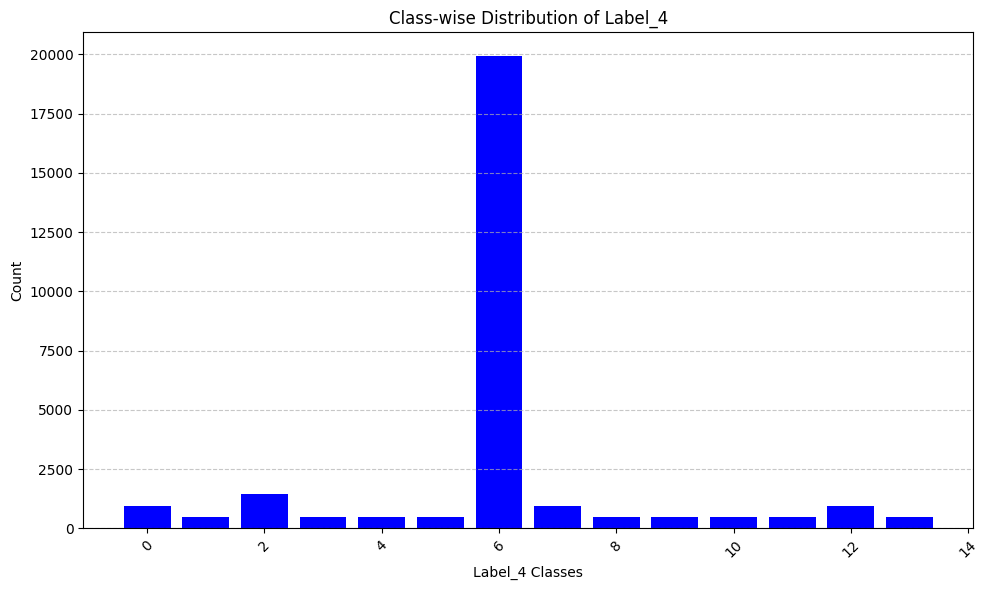

In [66]:
# Label_4 before over sampling

class_counts = y_train[L4].value_counts().reset_index()
class_counts.columns = ['Label_4', 'Count']

class_counts = class_counts.sort_values(by='Label_4')

plt.figure(figsize=(10, 6))
plt.bar(class_counts['Label_4'], class_counts['Count'], color='blue')
plt.title('Class-wise Distribution of Label_4')
plt.xlabel('Label_4 Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Over sample the data

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
# # Over sampeling Label_4
# y_train_L4 = y_train[L4].to_numpy().reshape(-1, 1)

# ros = RandomOverSampler(random_state=42)

# X_resampled, y_resampled = ros.fit_resample(x_train_trans_L4, y_train_L4)

# y_resampled = y_resampled.ravel()

In [69]:
# X_resampled.shape, y_resampled.shape

In [70]:
# # Label_4 After Over Sampling
# unique_classes, class_counts = np.unique(y_train_L4, return_counts=True)


# plt.figure(figsize=(10, 6))
# plt.bar(unique_classes, class_counts, color='blue')
# plt.title('Class-wise Distribution of Label_4')
# plt.xlabel('Label_4 Classes')
# plt.ylabel('Count')
# plt.xticks(unique_classes)  # Set x-ticks to unique classes
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

## Hyper Parameter Tuning

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [72]:
# Grid search for hyperparameter tuning with kNN model

param_grid = {
    'n_neighbors': [5, 10],
    'weights': ['uniform', 'distance']
}

 # Create a KFold cross-validation object
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)


scaler = StandardScaler()
x_train_trans_L4_scaled = scaler.fit_transform(x_train_trans_L4)
# x_train_trans_L4_scaled = scaler.fit_transform(x_train_trans_L4)


# Create a GridSearchCV object with consistent preprocessing and random seed
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on the scaled training data
grid_search.fit(x_train_trans_L4_scaled, y_train[L4])
# grid_search.fit(x_train_trans_L4_scaled, y_train[L4])

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Get the best model with the best hyperparameters
best_knn_L4 = grid_search.best_estimator_

# y_new_trans_L4 = best_knn_L4.predict(scaler.fit_transform(x_valid_trans_L4))



Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Hyperparameters: {'n_neighbors': 5, 'weights': 'distance'}
Best Accuracy Score: 0.9242636080369628


In [73]:
# Get Predictions
y_test_L4 = best_knn_L4.predict(scaler.fit_transform(x_test_trans_L4))

In [74]:
# print("========================= Acuuracy After k fold Cross Validation and Hyper Parameter Tuning Label 3 =========================")
# print(f"Accuracy: {metrics.accuracy_score(y_valid[L4], y_new_trans_L4)}")
# print(f"Precision: {metrics.precision_score(y_valid[L4], y_new_trans_L4, average='weighted')}")
# print(f"Recall: {metrics.recall_score(y_valid[L4], y_new_trans_L4,average='weighted')}")

# Result Writing

In [75]:
output_df = pd.DataFrame({
    'ID': id_test,
    'label_1': y_test_L1,
    'label_2': y_test_L2,
    'label_3': y_test_L3,
    'label_4': y_test_L4
})

In [76]:
# Write the results to the CSV file
output_df.to_csv(f"output/UOM_190394R.csv", index=False)

In [78]:
joblib.dump(best_knn_L4, "models/Lyr7_Lbl4.joblib")
joblib.dump(best_estimator_L3, "models/Lyr7_Lbl3.joblib")
joblib.dump(best_estimator_L2, "models/Lyr7_Lbl2.joblib")
joblib.dump(best_estimator_L1, "models/Lyr7_Lbl1.joblib")

['models/Lyr7_Lbl1.joblib']